# NetWork Validation

### An example using pyrosm to analyse sfbay network

In [5]:
# Import the library
import pyrosm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)
# Initialize the OSM object
fp = 'data/sf-bay.osm.pbf'
osm = pyrosm.OSM(fp)
# See the type
print("Type of 'osm' instance: ", type(osm))

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


<AxesSubplot:>

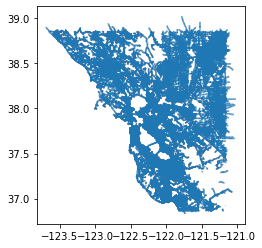

In [3]:
# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

The network contains various information that is parsed from the OSM data, and includes length column that contains information about the length of the road in meters.
Each way in the network is represented as a MultiLineString geometry constructed from multiple road segments. This is how the data is represented by default in OSM. However, this differs if reading nodes and edges: in that case each road segment is represented as a separate row in data (to improve connectivity)

In [4]:
display(drive_net.head(2))
display(drive_net.columns)

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,yes,None,None,None,None,None,secondary_link,...,None,None,None,4304424,1471846629,13,"{""layer"":""1""}",way,"MULTILINESTRING ((-122.04703 37.38676, -122.04...",80.0
1,None,None,None,None,None,None,None,None,None,service,...,None,None,None,4307859,1379664394,6,None,way,"MULTILINESTRING ((-122.01816 37.35825, -122.01...",219.0


Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit',
       'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle', 'name', 'oneway',
       'overtaking', 'passing_places', 'psv', 'ref', 'service', 'segregated',
       'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn',
       'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry',
       'length'],
      dtype='object')

I'm thinking about we may could have some way of checking the connections between different roads, several important things here:

1. Road classification
2. Road connectivity

some usefule links:

A very comprehensive description of the validation of the network from OSM: https://wiki.openstreetmap.org/wiki/Tasking_Manager/Validating_data

A demo of network validation:
https://www.youtube.com/watch?v=2h12CKnvK38&t=38s